<a href="https://colab.research.google.com/github/dsklnr/Predicting_Salaries_of_Technical_Individuals/blob/Parisa/Copy_of_Final_Predicting_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from google.colab import drive
from google.colab import files

In [3]:
# Format the Jupyter notebook output to show all columns and rows
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
# Allowing google colab to access drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Uploading dataset
uploaded = files.upload()

Saving survey_results_public.csv to survey_results_public.csv


Data Preprocessing

In [6]:
survey = pd.read_csv("/content/survey_results_public.csv")
survey_df = pd.DataFrame(survey)
survey_df

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom

Corrolation

In [7]:
survey_df.corr(method='pearson')

<ipython-input-7-6d2681c7efe5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  survey_df.corr(method='pearson')


,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
ResponseId,1.000000,-0.000079,NaN,NaN,0.052430,-0.005693
CompTotal,-0.000079,1.000000,NaN,NaN,0.028001,0.029703
VCHostingPersonal use,NaN,NaN,NaN,NaN,NaN,NaN
VCHostingProfessional use,NaN,NaN,NaN,NaN,NaN,NaN
WorkExp,0.052430,0.028001,NaN,NaN,1.000000,0.051329
ConvertedCompYearly,-0.005693,0.029703,NaN,NaN,0.051329,1.000000


In [8]:
survey_df.shape

(73268, 79)

In [9]:
survey_df.dtypes

ResponseId                          int64
MainBranch                         object
Employment                         object
RemoteWork                         object
CodingActivities                   object
EdLevel                            object
LearnCode                          object
LearnCodeOnline                    object
LearnCodeCoursesCert               object
YearsCode                          object
YearsCodePro                       object
DevType                            object
OrgSize                            object
PurchaseInfluence                  object
BuyNewTool                         object
Country                            object
Currency                           object
CompTotal                         float64
CompFreq                           object
LanguageHaveWorkedWith             object
LanguageWantToWorkWith             object
DatabaseHaveWorkedWith             object
DatabaseWantToWorkWith             object
PlatformHaveWorkedWith            

In [10]:
# Get the total number of non null values for each column
non_nulls = survey_df.count()

# Sort the number of nun null values for each column from greatest to least
non_nulls.sort_values(ascending=False)

ResponseId                        73268
MainBranch                        73268
Country                           71771
Employment                        71709
LearnCode                         71580
SOAccount                         71572
EdLevel                           71571
SOComm                            71408
VersionControlSystem              71379
NEWSOSites                        71365
YearsCode                         71331
Blockchain                        71071
LanguageHaveWorkedWith            70975
OpSysPersonal use                 70963
SOVisitFreq                       70961
Age                               70946
Gender                            70853
SurveyEase                        70508
SurveyLength                      70444
NEWCollabToolsHaveWorkedWith      70347
Trans                             70315
Ethnicity                         69474
VCInteraction                     68156
BuyNewTool                        67963
Accessibility                     67244


In [11]:
# Get the total number of null values for each column
total_nulls = survey_df.isnull().sum()

# Sort the number of null values for each column from least to most
total_nulls.sort_values(ascending=True)

ResponseId                            0
MainBranch                            0
Country                            1497
Employment                         1559
LearnCode                          1688
SOAccount                          1696
EdLevel                            1697
SOComm                             1860
VersionControlSystem               1889
NEWSOSites                         1903
YearsCode                          1937
Blockchain                         2197
LanguageHaveWorkedWith             2293
OpSysPersonal use                  2305
SOVisitFreq                        2307
Age                                2322
Gender                             2415
SurveyEase                         2760
SurveyLength                       2824
NEWCollabToolsHaveWorkedWith       2921
Trans                              2953
Ethnicity                          3794
VCInteraction                      5112
BuyNewTool                         5305
Accessibility                      6024


In [12]:
# Get the total number of survey responses
total = survey_df['ResponseId'].count()

# Get the total percentage of nulls for each column
percent_col_null = total_nulls / total * 100

# Sort the perctange of null values for each column from least to most
percent_col_null.sort_values(ascending=True)

ResponseId                          0.000000
MainBranch                          0.000000
Country                             2.043184
Employment                          2.127805
LearnCode                           2.303871
SOAccount                           2.314790
EdLevel                             2.316154
SOComm                              2.538625
VersionControlSystem                2.578206
NEWSOSites                          2.597314
YearsCode                           2.643719
Blockchain                          2.998581
LanguageHaveWorkedWith              3.129606
OpSysPersonal use                   3.145985
SOVisitFreq                         3.148714
Age                                 3.169187
Gender                              3.296118
SurveyEase                          3.766992
SurveyLength                        3.854343
NEWCollabToolsHaveWorkedWith        3.986734
Trans                               4.030409
Ethnicity                           5.178250
VCInteract

In [13]:
# Get all education level values and the count for each level
survey_df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30276
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15486
Some college/university study without earning a degree                                 9326
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7904
Associate degree (A.A., A.S., etc.)                                                    2236
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2169
Primary/elementary school                                                              1806
Something else                                                                         1247
Professional degree (JD, MD, etc.)                                                     1121
Name: EdLevel, dtype: int64

In [14]:
# Remove all rows with null values for total compensation
comp_total_df = survey_df[survey_df['CompTotal'].notna()]

# Get the new total number of null values
revised_df = comp_total_df.isnull().sum()

# Sort the number of null values for each column from least to most
revised_df.sort_values(ascending=True)

ResponseId                            0
MainBranch                            0
CompTotal                             0
Currency                              0
Country                               0
Employment                            4
EdLevel                              18
LearnCode                            21
OrgSize                              31
SOAccount                            33
VersionControlSystem                 42
PurchaseInfluence                    47
RemoteWork                           72
YearsCode                            73
CompFreq                             75
SOComm                               80
Age                                  88
CodingActivities                     91
NEWSOSites                           93
DevType                             100
LanguageHaveWorkedWith              116
Blockchain                          117
Gender                              135
SOVisitFreq                         137
YearsCodePro                        144


In [15]:
# Create a new data frame from the comp_total_df that only has CompTotal > 0
comp_total_not0_df = comp_total_df[comp_total_df['CompTotal'] > 0]

In [16]:
# Create a new data frame from the comp_total_df that only has respondents from the United States
us_df = comp_total_not0_df[comp_total_not0_df['Country'] == 'United States of America']

In [17]:
# Create a subset data frame with dependent vartiables for the study
study_df = us_df[['CompTotal', 'YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
study_df

,CompTotal,YearsCodePro,EdLevel,RemoteWork,OrgSize
11,194400.0,10,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fully remote,20 to 99 employees
12,65000.0,5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Hybrid (some remote, some in-person)",2 to 9 employees
14,110000.0,5,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Fully remote,"5,000 to 9,999 employees"
26,106960.0,5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Hybrid (some remote, some in-person)",20 to 99 employees
28,130000.0,14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)","10,000 or more employees"
...,...,...,...,...,...
73223,200000.0,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Hybrid (some remote, some in-person)",100 to 499 employees
73226,130000.0,16,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fully remote,"1,000 to 4,999 employees"
73229,325000.0,15,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Full in-person,500 to 999 employees
73254,115000.0,6,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)","10,000 or more employees"


In [18]:
# Get the total number of null values for each column in the study's data frame
null_total = study_df.isnull().sum()

# Get the total number of values for each column
study_total = study_df.count()

# Get the percentage of nulls for each column
percent_null = null_total / study_total * 100

# Sort the perctange of null values for each column from least to most
#percent_null.sort_values(ascending=True)
null_total

CompTotal        0
YearsCodePro    23
EdLevel          0
RemoteWork      17
OrgSize          3
dtype: int64

In [19]:
# Drop all null values from the data frame
dropped_nulls_df = study_df.dropna()

# Get the total count for each cleaned column
dropped_nulls_df.count()

CompTotal       8711
YearsCodePro    8711
EdLevel         8711
RemoteWork      8711
OrgSize         8711
dtype: int64

In [20]:
# Parse the CodePro column to keep integer values
dropped_nulls_df.loc[dropped_nulls_df['YearsCodePro'] == 'More than 50 years', 'YearsCodePro'] = 50
dropped_nulls_df.loc[dropped_nulls_df['YearsCodePro'] == 'Less than 1 year', 'YearsCodePro'] = 0

# Convert YearsCodePro from an object data type to a integer
dropped_nulls_df['YearsCodePro'] = pd.to_numeric(dropped_nulls_df['YearsCodePro'], errors='coerce')

<ipython-input-20-99221c49fa27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_nulls_df['YearsCodePro'] = pd.to_numeric(dropped_nulls_df['YearsCodePro'], errors='coerce')


In [21]:
# Get the data type for each column
dropped_nulls_df.dtypes

CompTotal       float64
YearsCodePro      int64
EdLevel          object
RemoteWork       object
OrgSize          object
dtype: object

In [22]:
# Remove outliers from total compensation
quartile1 = dropped_nulls_df['CompTotal'].quantile(0.25)
quartile3 = dropped_nulls_df['CompTotal'].quantile(0.75)
iqr = quartile3 - quartile1
lower_bound = quartile1 - 1.5 * iqr
upper_bound = quartile3 + 1.5 * iqr
removed_outliers = dropped_nulls_df[(dropped_nulls_df['CompTotal'] >= lower_bound)
        & (dropped_nulls_df['CompTotal'] <= upper_bound)]

In [23]:
# Get the new dataframe count
removed_outliers.count()

CompTotal       8285
YearsCodePro    8285
EdLevel         8285
RemoteWork      8285
OrgSize         8285
dtype: int64

In [24]:
# remove outliers from years of profesionally programming
quartile1 = removed_outliers['YearsCodePro'].quantile(0.25)
quartile3 = removed_outliers['YearsCodePro'].quantile(0.75)
iqr = quartile3 - quartile1
lower_bound = quartile1 - 1.5 * iqr
upper_bound = quartile3 + 1.5 * iqr
removed_outliers = removed_outliers[(removed_outliers['YearsCodePro'] >= lower_bound)
        & (removed_outliers['YearsCodePro'] <= upper_bound)]

In [25]:
# Get the new dataframe count
removed_outliers.count()

CompTotal       7974
YearsCodePro    7974
EdLevel         7974
RemoteWork      7974
OrgSize         7974
dtype: int64

Exploratory Data Analysis

Text(0, 0.5, 'Total Compensation')

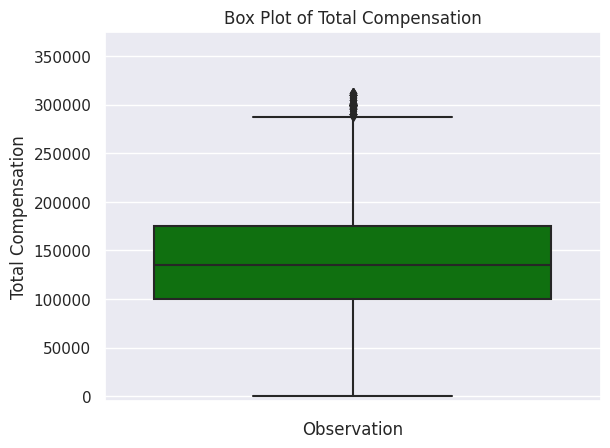

In [26]:
# Create a boxplot for total compensation with removed outliers
sns.set(style = 'darkgrid')
sns.boxplot(y = removed_outliers['CompTotal'], color = 'green')
plt.ylim(-5000, 375000)
plt.title("Box Plot of Total Compensation")
plt.xlabel("Observation")
plt.ylabel("Total Compensation")

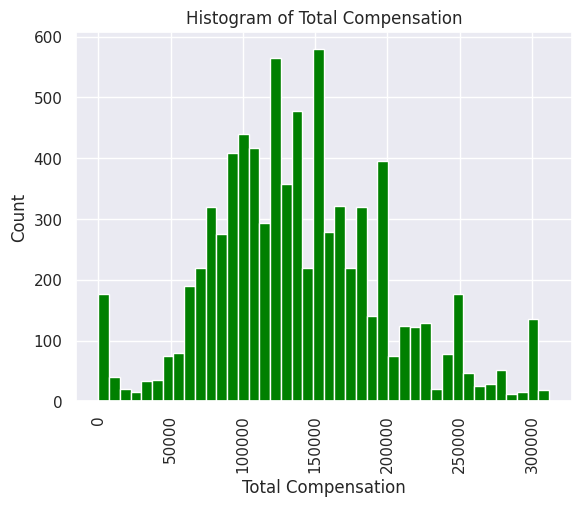

In [27]:
# Create histogram for CompTotal
plt.hist(data =removed_outliers, x = "CompTotal", bins='auto', color = 'green')
plt.xticks(rotation = 90)
plt.title("Histogram of Total Compensation")
plt.xlabel("Total Compensation")
plt.ylabel("Count")
plt.show()

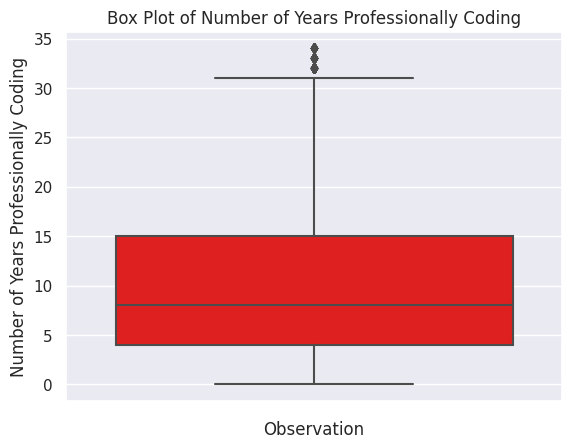

In [28]:
# Create histogram for years of professionally programming
sns.boxplot(y = removed_outliers['YearsCodePro'], color = 'red')
plt.xticks(rotation = 90)
plt.title("Box Plot of Number of Years Professionally Coding")
plt.xlabel("Observation")
plt.ylabel("Number of Years Professionally Coding")
plt.show()

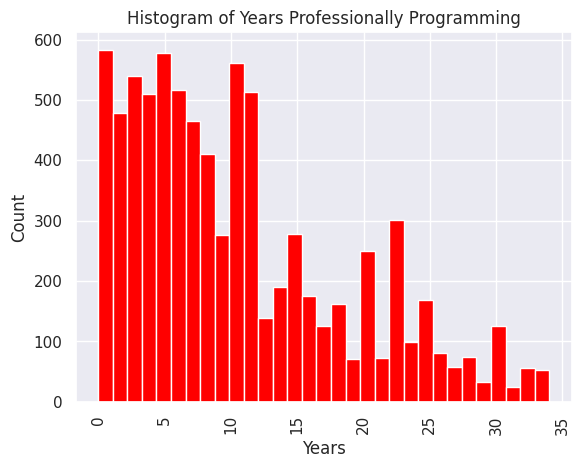

In [29]:
# Create histogram for years of professionally programming
plt.hist(data =removed_outliers, x = "YearsCodePro", bins='auto', color = 'red')
plt.xticks(rotation = 90)
plt.title("Histogram of Years Professionally Programming")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

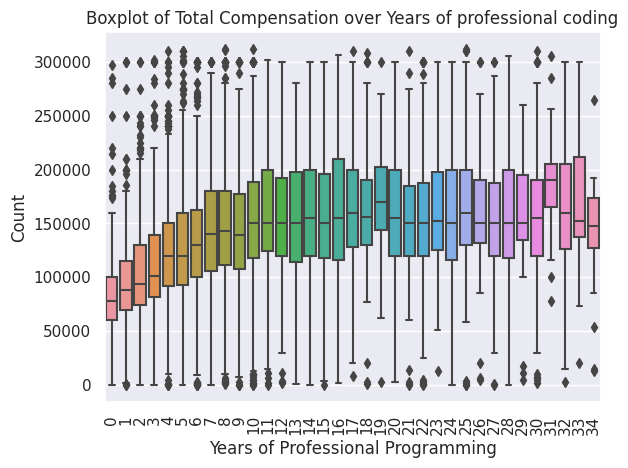

In [30]:
# Create boxplots for CompTotal considering YearsCodePro
sns.boxplot(data = removed_outliers, x = 'YearsCodePro', y = 'CompTotal')
plt.xticks(rotation = 90)
plt.title("Boxplot of Total Compensation over Years of professional coding")
plt.xlabel("Years of Professional Programming")
plt.ylabel("Count")
plt.show()

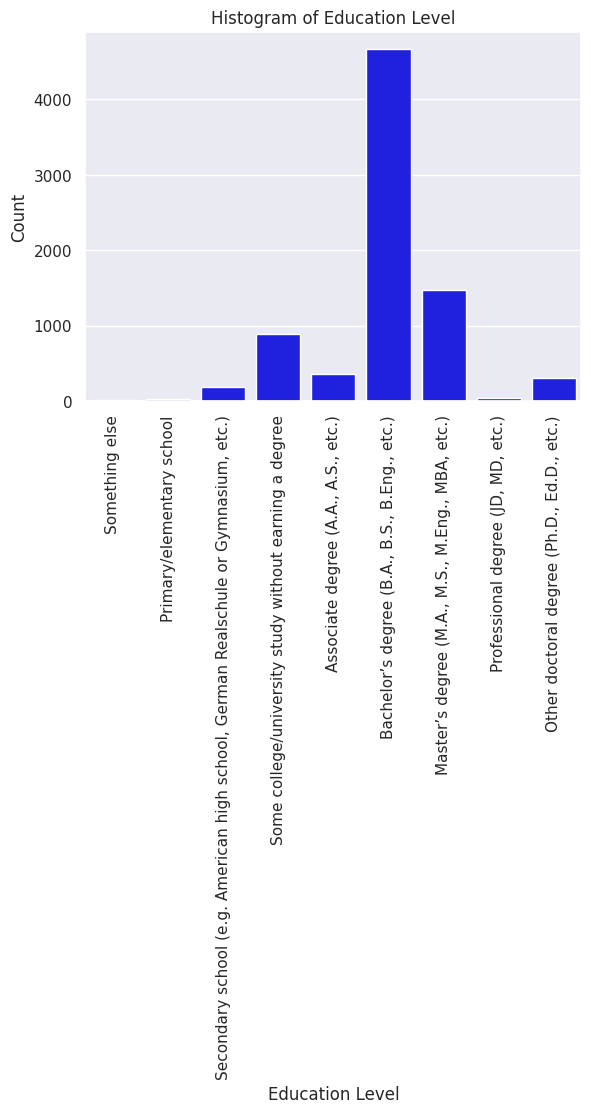

In [31]:
# Order education level
educ_order = ["Something else",
              "Primary/elementary school",
              "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
              "Some college/university study without earning a degree",
              "Associate degree (A.A., A.S., etc.)",
              "Bachelor’s degree (B.A., B.S., B.Eng., etc.)",
              "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
              "Professional degree (JD, MD, etc.)",
              "Other doctoral degree (Ph.D., Ed.D., etc.)"]

# Create histogram for Education Level
sns.countplot(data = removed_outliers, x = "EdLevel", color = 'blue', order = educ_order)
plt.xticks(rotation = 90)
plt.title("Histogram of Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

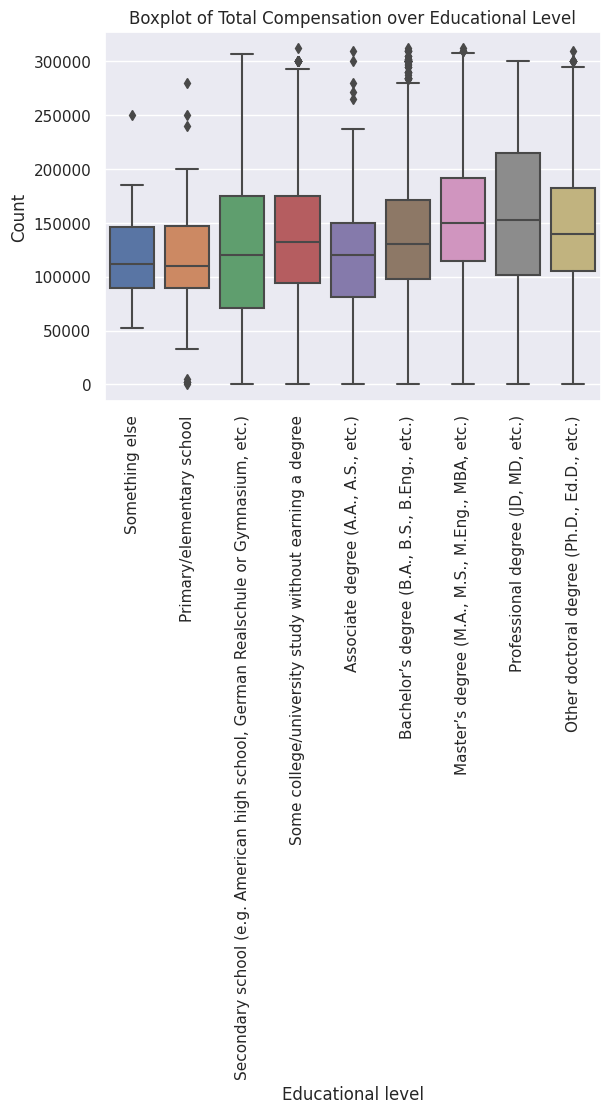

In [32]:
# Create boxplots for CompTotal considering Educational level
sns.boxplot(data = removed_outliers, x = 'EdLevel', y = 'CompTotal',order = educ_order)
plt.xticks(rotation = 90)
plt.title("Boxplot of Total Compensation over Educational Level")
plt.xlabel("Educational level")
plt.ylabel("Count")
plt.show()

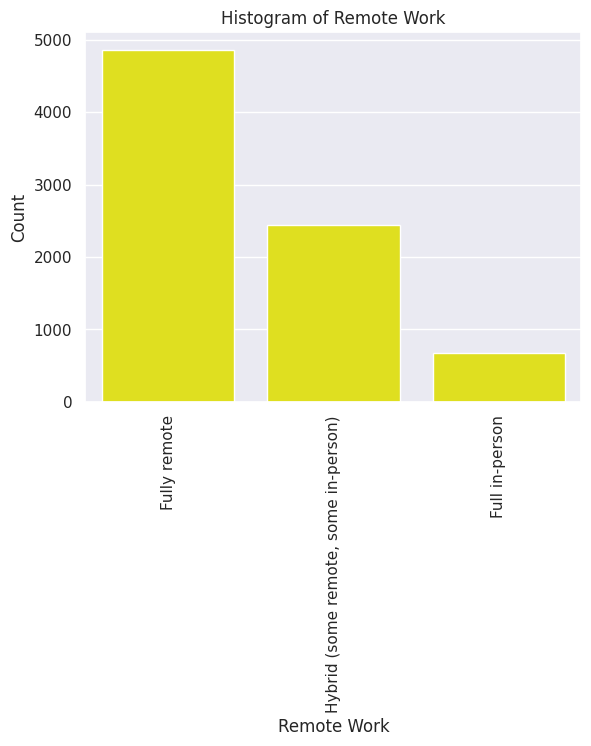

In [33]:
# Create histogram for remote work type
sns.countplot(data = removed_outliers, x = "RemoteWork", color = 'yellow')
plt.xticks(rotation = 90)
plt.title("Histogram of Remote Work")
plt.xlabel("Remote Work")
plt.ylabel("Count")
plt.show()

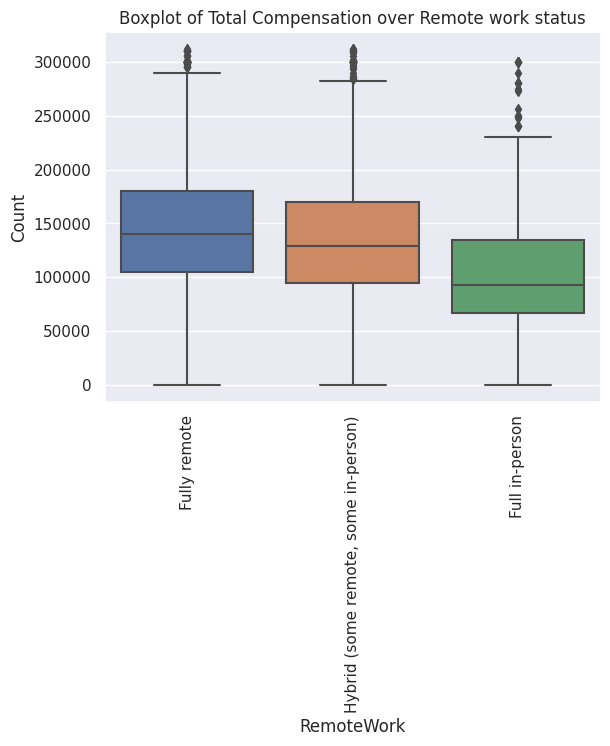

In [34]:
# Create boxplots for CompTotal considering Remote Work
sns.boxplot(data = removed_outliers, x = 'RemoteWork', y = 'CompTotal')
plt.xticks(rotation = 90)
plt.title("Boxplot of Total Compensation over Remote work status")
plt.xlabel("RemoteWork")
plt.ylabel("Count")
plt.show()

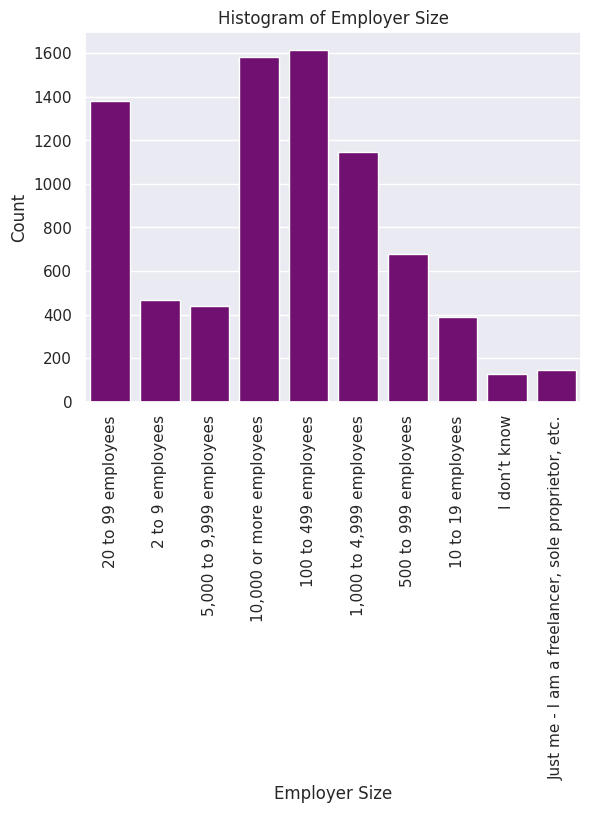

In [35]:
# Create histogram for employer size
sns.countplot(data = removed_outliers, x = "OrgSize", color = 'purple')
plt.xticks(rotation = 90)
plt.title("Histogram of Employer Size")
plt.xlabel("Employer Size")
plt.ylabel("Count")
plt.show()

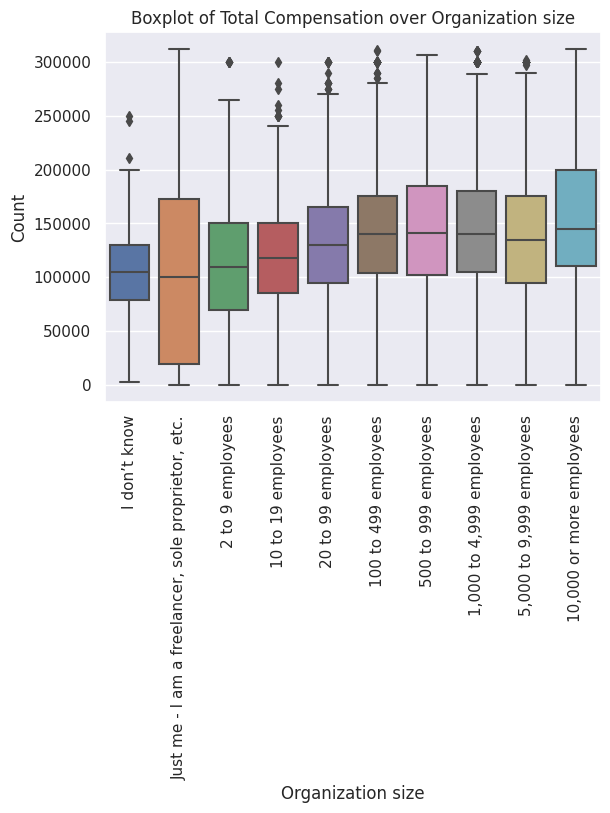

In [36]:
# Show employer size from smallest to largest
size_order=["I don’t know",
            "Just me - I am a freelancer, sole proprietor, etc.",
            "2 to 9 employees",
            "10 to 19 employees",
            "20 to 99 employees",
            "100 to 499 employees",
            "500 to 999 employees",
            "1,000 to 4,999 employees",
            "5,000 to 9,999 employees",
            "10,000 or more employees"]

# Create boxplots for CompTotal considering OrgSize
sns.boxplot(data = removed_outliers, x = 'OrgSize', y = 'CompTotal',order = size_order)
plt.xticks(rotation = 90)
plt.title("Boxplot of Total Compensation over Organization size")
plt.xlabel("Organization size")
plt.ylabel("Count")
plt.show()

In [37]:
# Perform descriptive statistics on all numeric columns in the DataFrame
removed_outliers.describe()

,CompTotal,YearsCodePro
count,7974.000000,7974.000000
mean,139320.753323,10.547906
std,60469.030541,8.101770
min,1.000000,0.000000
25%,100000.000000,4.000000
50%,135000.000000,8.000000
75%,175000.000000,15.000000
max,312000.000000,34.000000


In [38]:
# Get the total number of rows
total_clean = removed_outliers.count()
total_clean

CompTotal       7974
YearsCodePro    7974
EdLevel         7974
RemoteWork      7974
OrgSize         7974
dtype: int64

In [39]:
# Define the threshold and baseline model
comp_threshold = 84000

baseline = removed_outliers[removed_outliers['CompTotal'] > comp_threshold].shape[0]
above_cost_of_living = baseline / total_clean.count()
print(f"Percent above the cost of living: {round(above_cost_of_living * 100, 4)}%")

Percent above the cost of living: 133940.0%


In [40]:
# For classification purpose Total compensation is defined by the threshold
removed_outliers.loc[removed_outliers['CompTotal'] <= comp_threshold, 'CompTotal'] = 0
removed_outliers.loc[removed_outliers['CompTotal'] > comp_threshold, 'CompTotal'] = 1

In [41]:
# Divide the clean data frame into test and train data frames
#test_size = int(len(removed_outliers) * 0.33)
#train_size = len(removed_outliers) - test_size

X = removed_outliers[['YearsCodePro', 'EdLevel', 'RemoteWork', 'OrgSize']]
y = removed_outliers['CompTotal']

In [42]:
removed_outliers.corr(method='pearson')

<ipython-input-42-50913fc9f07e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  removed_outliers.corr(method='pearson')


,CompTotal,YearsCodePro
CompTotal,1.000000,0.233997
YearsCodePro,0.233997,1.000000


In [43]:
pd.crosstab(index=removed_outliers['EdLevel'], columns=removed_outliers['CompTotal'])

CompTotal,0.0,1.0
EdLevel,,
"Associate degree (A.A., A.S., etc.)",97,268
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",732,3933
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",150,1323
"Other doctoral degree (Ph.D., Ed.D., etc.)",42,262
Primary/elementary school,8,25
"Professional degree (JD, MD, etc.)",5,37
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",56,127
Some college/university study without earning a degree,182,707
Something else,5,15


In [44]:
pd.crosstab(index=removed_outliers['RemoteWork'], columns=removed_outliers['CompTotal'])

CompTotal,0.0,1.0
RemoteWork,,
Full in-person,279,388
Fully remote,581,4282
"Hybrid (some remote, some in-person)",417,2027


In [45]:
pd.crosstab(index=removed_outliers['OrgSize'], columns=removed_outliers['CompTotal'])

CompTotal,0.0,1.0
OrgSize,,
"1,000 to 4,999 employees",148,1000
10 to 19 employees,95,295
"10,000 or more employees",161,1421
100 to 499 employees,199,1417
2 to 9 employees,151,315
20 to 99 employees,259,1123
"5,000 to 9,999 employees",70,368
500 to 999 employees,91,588
I don’t know,37,89


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Randomly select rows for the test and train data frames
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
# Get the count of the test data frame
X_train.count(), y_train.count()

(YearsCodePro    5342
 EdLevel         5342
 RemoteWork      5342
 OrgSize         5342
 dtype: int64,
 5342)

In [49]:
# Get the count of the train data frame
X_test.count() , y_test.count()

(YearsCodePro    2632
 EdLevel         2632
 RemoteWork      2632
 OrgSize         2632
 dtype: int64,
 2632)

Modeling

In [50]:
# Create dummy variables for categorical variables
X_train_dummies = pd.get_dummies(X_train, columns=['EdLevel', 'RemoteWork', 'OrgSize'])
X_test_dummies = pd.get_dummies(X_test, columns=['EdLevel', 'RemoteWork', 'OrgSize'])

# Create a standard scalar instance
scaler = StandardScaler()

# Scale the 'YearsCodePro' feature in both training and testing data
X_train_dummies[['YearsCodePro']] = scaler.fit_transform(X_train_dummies[['YearsCodePro']])
X_test_dummies[['YearsCodePro']] = scaler.transform(X_test_dummies[['YearsCodePro']])


Decision tree, a supervised learning method

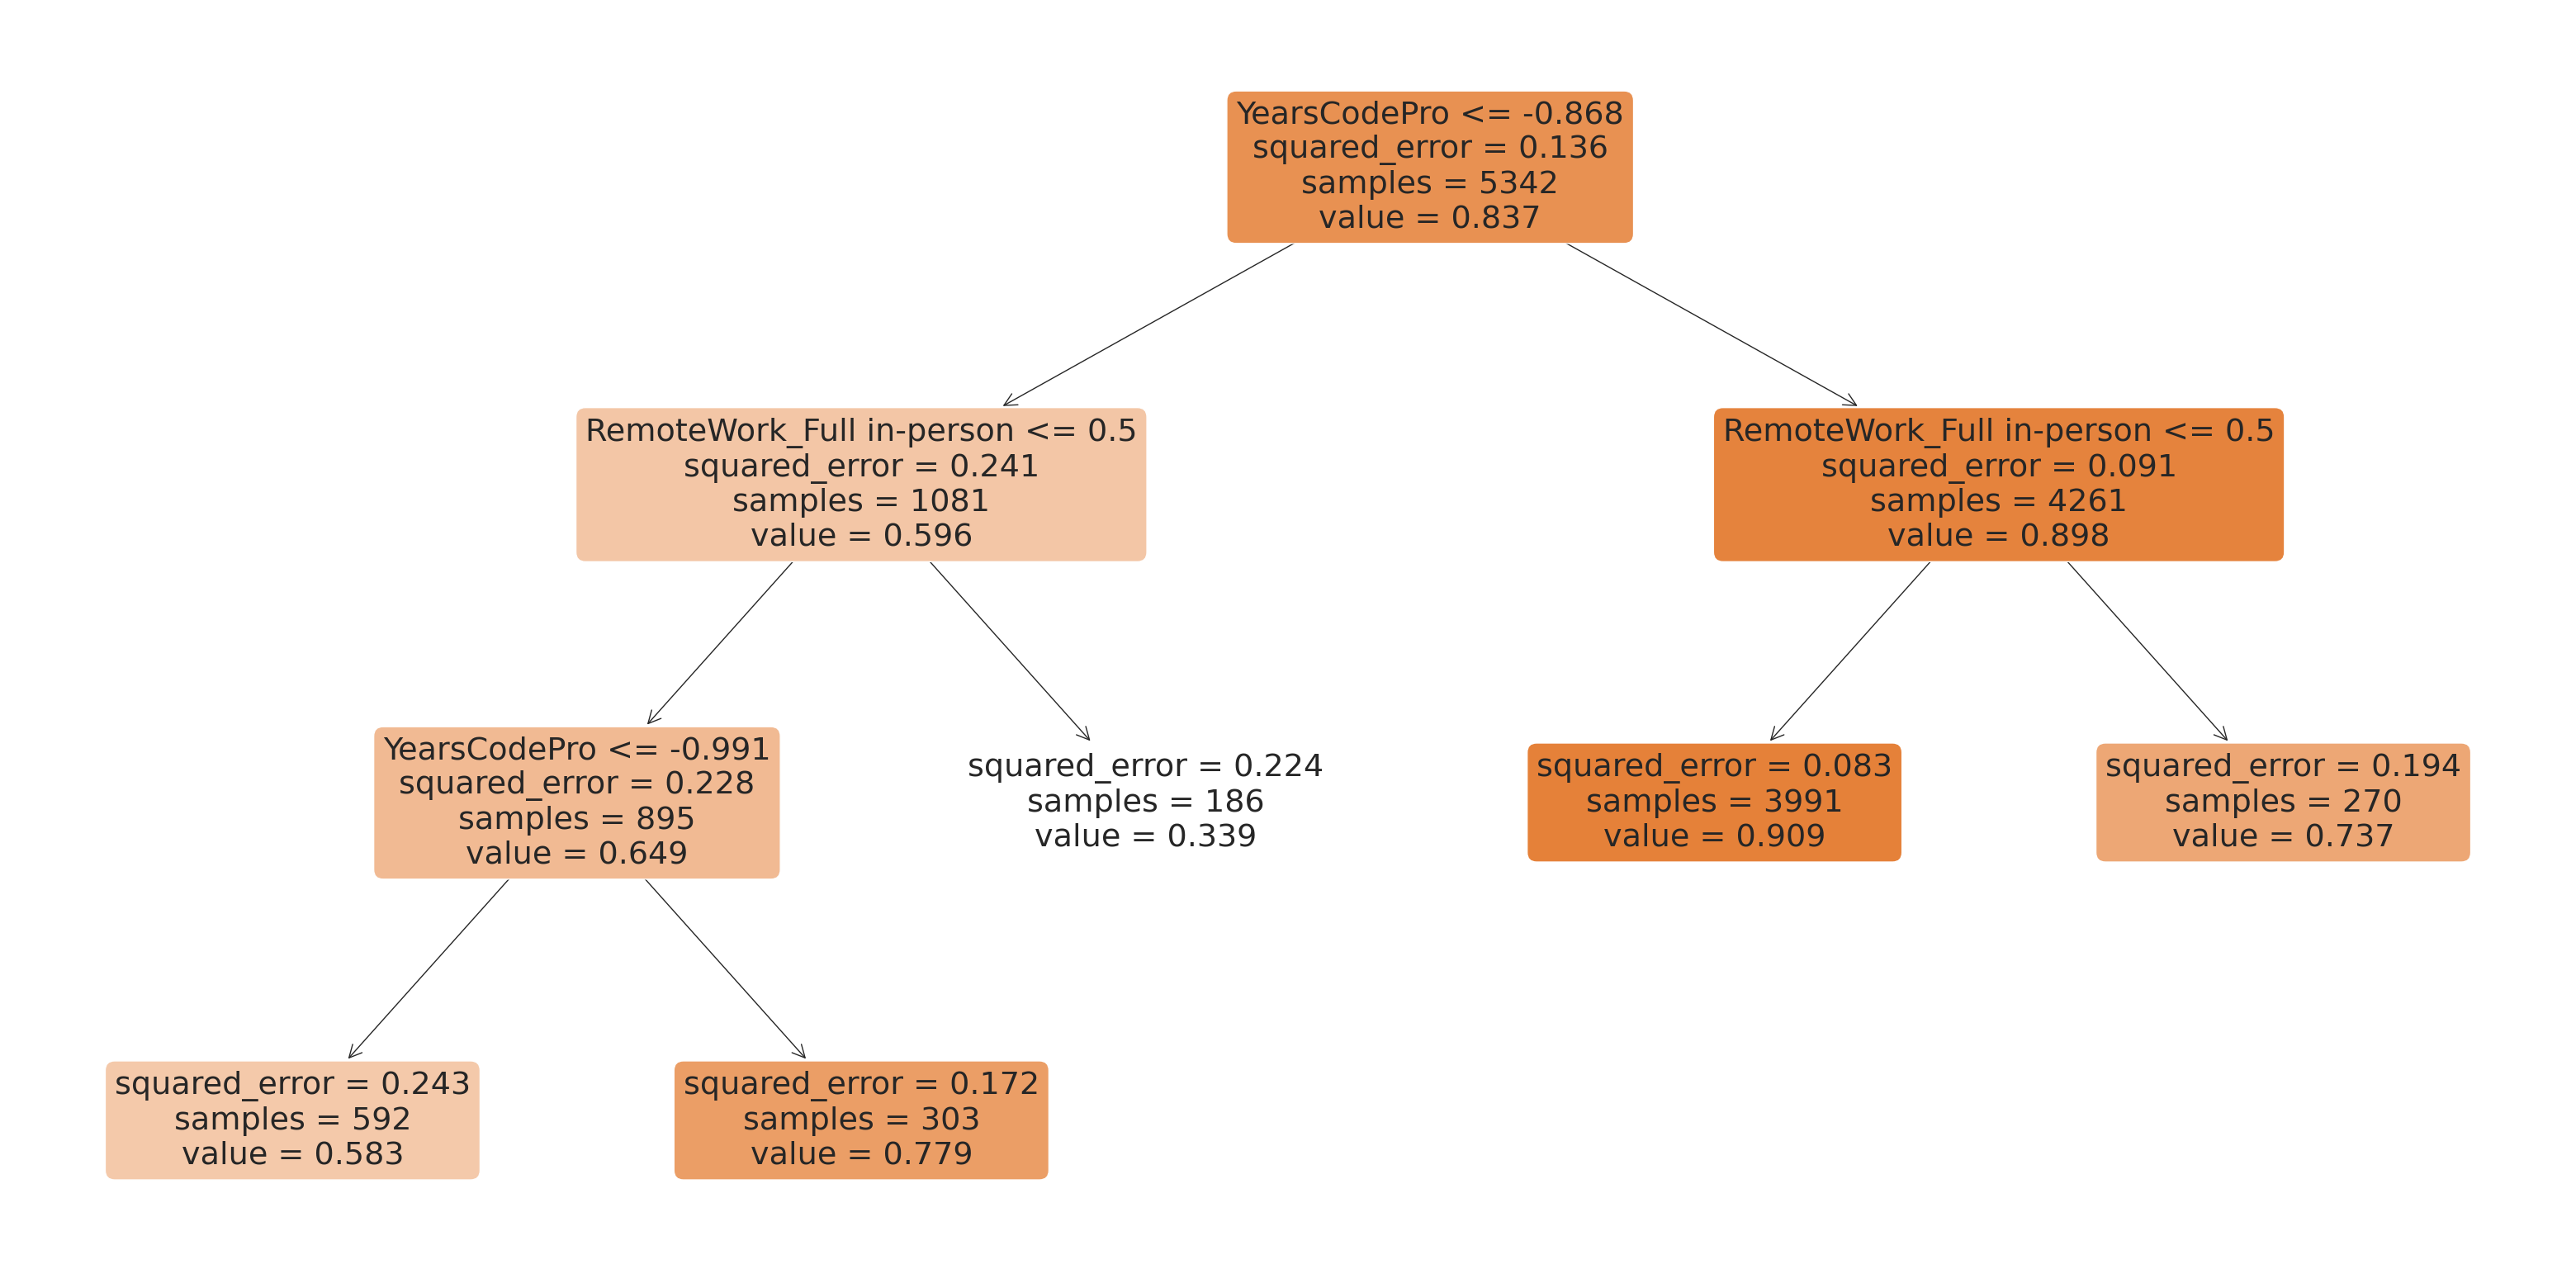

In [51]:
# Create a decision tree utilizing the CART algorithm
cart_train = DecisionTreeRegressor(max_leaf_nodes=5).fit(X_train_dummies, y_train)

# Show the decision tree
plt.figure(figsize=(40, 20))
plot_tree(cart_train, feature_names=X_train_dummies.columns, filled=True, rounded=True)
plt.show()

In [52]:
# Use the decision tree to make predictions
y_prediction = cart_train.predict(X_test_dummies)

# Save values for ROC curve
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_prediction)
auc1 = round(metrics.roc_auc_score(y_test, y_prediction), 4)


In [53]:
# Convert regession predictions into binary classes
y_prediction[y_prediction <= 0.5] = 0
y_prediction[y_prediction > 0.5] = 1

# Create confusion matrix to evaluate predictions
confusion = metrics.confusion_matrix(y_test, y_prediction)

# Define class labels
class_labels = ['< $85,000', '>= $85,000']

# Create a confusion matrix using a dataframe
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)
confusion_df

,"< $85,000",">= $85,000"
"< $85,000",40,366
">= $85,000",23,2203


In [54]:
# Print the classification report
print(classification_report(y_test, y_prediction, target_names = class_labels))

              precision    recall  f1-score   support

   < $85,000       0.63      0.10      0.17       406
  >= $85,000       0.86      0.99      0.92      2226

    accuracy                           0.85      2632
   macro avg       0.75      0.54      0.54      2632
weighted avg       0.82      0.85      0.80      2632



K-Nearest Neighbour (KNN), a supervised learning method

In [55]:
# Create a KNN model with 5 neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_dummies, y_train)

# Predict total comp
y_prediction = knn_model.predict(X_test_dummies)

# Save values for ROC curve
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_prediction)
auc2 = round(metrics.roc_auc_score(y_test, y_prediction), 4)


In [56]:
# Convert regession predictions into binary classes
y_prediction[y_prediction <= 0.5] = 0
y_prediction[y_prediction > 0.5] = 1

# Create confusion matrix to evaluate predictions
confusion = metrics.confusion_matrix(y_test, y_prediction)

# Create a confusion matrix using a dataframe
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)
confusion_df

,"< $85,000",">= $85,000"
"< $85,000",112,294
">= $85,000",99,2127


In [57]:
# Print the classification report
print(classification_report(y_test, y_prediction, target_names = class_labels))

              precision    recall  f1-score   support

   < $85,000       0.53      0.28      0.36       406
  >= $85,000       0.88      0.96      0.92      2226

    accuracy                           0.85      2632
   macro avg       0.70      0.62      0.64      2632
weighted avg       0.82      0.85      0.83      2632



Naive Bayes, a supervised learning method


In [58]:
# Create a Naive Bayes model
nb_model = GaussianNB().fit(X_train_dummies, y_train)

# Predict total compensation
y_prediction = nb_model.predict(X_test_dummies)

# Save values for ROC curve
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_prediction)
auc3 = round(metrics.roc_auc_score(y_test, y_prediction), 4)


In [59]:
# Convert regession predictions into binary classes
y_prediction[y_prediction <= 0.5] = 0
y_prediction[y_prediction > 0.5] = 1

# Create confusion matrix to evaluate predictions
confusion = metrics.confusion_matrix(y_test, y_prediction)

# Create a confusion matrix using a dataframe
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)
confusion_df

,"< $85,000",">= $85,000"
"< $85,000",184,222
">= $85,000",355,1871


In [60]:
# Print the classification report
print(classification_report(y_test, y_prediction, target_names = class_labels))

              precision    recall  f1-score   support

   < $85,000       0.34      0.45      0.39       406
  >= $85,000       0.89      0.84      0.87      2226

    accuracy                           0.78      2632
   macro avg       0.62      0.65      0.63      2632
weighted avg       0.81      0.78      0.79      2632



Logistic Regression, Supervised Learning method

In [61]:
# Add constant column to the feature matrix for intercept in the model
X_train_dummies = sm.add_constant(X_train_dummies)
X_test_dummies = sm.add_constant(X_test_dummies)

# Create a Logistic Regression model
logit_model = sm.Logit(y_train, X_train_dummies).fit()

# Predict total compensation
y_prediction = logit_model.predict(X_test_dummies)

# Convert predicted probabilities to binary predictions
y_prediction_binary = (y_prediction >= 0.5).astype(int)

# Save values for ROC curve
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_prediction)
auc4 = round(metrics.roc_auc_score(y_test, y_prediction), 4)

# Print the model summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.370179
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              CompTotal   No. Observations:                 5342
Model:                          Logit   Df Residuals:                     5321
Method:                           MLE   Df Model:                           20
Date:                Sun, 13 Aug 2023   Pseudo R-squ.:                  0.1676
Time:                        23:43:34   Log-Likelihood:                -1977.5
converged:                       True   LL-Null:                       -2375.5
Covariance Type:            nonrobust   LLR p-value:                9.707e-156
                                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------

In [62]:
# Convert regession predictions into binary classes
y_prediction[y_prediction <= 0.5] = 0
y_prediction[y_prediction > 0.5] = 1

# Create confusion matrix to evaluate predictions
confusion = metrics.confusion_matrix(y_test, y_prediction)

# Create a confusion matrix using a dataframe
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)
confusion_df

,"< $85,000",">= $85,000"
"< $85,000",72,334
">= $85,000",37,2189


In [63]:
# Print the classification report
print(classification_report(y_test, y_prediction, target_names = class_labels))

              precision    recall  f1-score   support

   < $85,000       0.66      0.18      0.28       406
  >= $85,000       0.87      0.98      0.92      2226

    accuracy                           0.86      2632
   macro avg       0.76      0.58      0.60      2632
weighted avg       0.84      0.86      0.82      2632



Neural Networks, supervised and unseupervised learning method


In [64]:
# neural network model
nnet01 = MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000)
nnet01.fit(X_train_dummies, y_train)

# Create total compensation predictions
y_prediction = nnet01.predict(X_test_dummies)

# Save values for ROC curve
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_prediction)
auc5 = round(metrics.roc_auc_score(y_test, y_prediction), 4)

In [65]:
# Convert regession predictions into binary classes
y_prediction[y_prediction <= 0.5] = 0
y_prediction[y_prediction > 0.5] = 1

# Create confusion matrix to evaluate predictions
confusion = metrics.confusion_matrix(y_test, y_prediction)

# Create a confusion matrix using a dataframe
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)
confusion_df

,"< $85,000",">= $85,000"
"< $85,000",114,292
">= $85,000",88,2138


In [66]:
# Print the classification report
print(classification_report(y_test, y_prediction, target_names = class_labels))

              precision    recall  f1-score   support

   < $85,000       0.56      0.28      0.37       406
  >= $85,000       0.88      0.96      0.92      2226

    accuracy                           0.86      2632
   macro avg       0.72      0.62      0.65      2632
weighted avg       0.83      0.86      0.83      2632



Random Forest

In [67]:
# Flatten to a 1-dimensional array for compatibility with RandomForestClassifier
rfy = np.ravel(y_train)
rfy_test = np.ravel(y_test)

# Create a random forest with 100 estimators
rf01 = RandomForestClassifier(n_estimators=100, criterion="gini").fit(X_train_dummies, rfy)

# Predict class probabilities using predict_proba
y_pred_prob = rf01.predict_proba(X_test_dummies)
y_prediction = np.argmax(y_pred_prob, axis=1)


# Save values for ROC curve
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_prob[:, 1])  # Use [:, 1] for positive class probabilities
auc6 = round(metrics.roc_auc_score(y_test, y_pred_prob[:, 1]), 4)

# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
f1 = f1_score(y_test, y_prediction)

print(f'Random Forest Model Accuracy: {round(accuracy * 100, 2)}%')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Random Forest Model Accuracy: 84.27%
Precision: 0.8790794979079498
Recall: 0.9438454627133872
F1-score: 0.9103119584055459


In [68]:
# Convert regession predictions into binary classes
y_prediction[y_prediction <= 0.5] = 0
y_prediction[y_prediction > 0.5] = 1

# Create confusion matrix to evaluate predictions
confusion = metrics.confusion_matrix(y_test, y_prediction)

# Create a confusion matrix using a dataframe
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)
confusion_df

,"< $85,000",">= $85,000"
"< $85,000",117,289
">= $85,000",125,2101


In [69]:
# Print the classification report
print(classification_report(y_test, y_prediction, target_names = class_labels))

              precision    recall  f1-score   support

   < $85,000       0.48      0.29      0.36       406
  >= $85,000       0.88      0.94      0.91      2226

    accuracy                           0.84      2632
   macro avg       0.68      0.62      0.64      2632
weighted avg       0.82      0.84      0.83      2632



Support Vector Machine (SVM),  A supervised Learning Model

In [70]:
# Create a Support Vector Machine (SVM) model
clf = SVC(kernel='rbf',gamma='auto') #not linear kernel
clf.fit(X_train_dummies, rfy)

# Flatten y_test to a 1 dimensional array
rfy_test = np.ravel(y_test)

# Create total compensation predictions
y_prediction = clf.predict(X_test_dummies)

# If predict_proba is not available, calculate class probabilities using decision function
y_decision_function = clf.decision_function(X_test_dummies)

# Save values for ROC curve
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_decision_function)
auc7 = round(metrics.roc_auc_score(y_test, y_decision_function), 4)

# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
precision = precision_score(y_test, y_prediction)
recall = recall_score(y_test, y_prediction)
f1 = f1_score(y_test, y_prediction)

print(f'Support Vector Machine Model Accuracy: {round(accuracy * 100, 2)}%')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Support Vector Machine Model Accuracy: 84.76%
Precision: 0.8473543966501713
Recall: 1.0
F1-score: 0.9173706985369875


In [71]:
# Convert regession predictions into binary classes
y_prediction[y_prediction <= 0.5] = 0
y_prediction[y_prediction > 0.5] = 1

# Create confusion matrix to evaluate predictions
confusion = metrics.confusion_matrix(y_test, y_prediction)

# Create a confusion matrix using a dataframe
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)
confusion_df

,"< $85,000",">= $85,000"
"< $85,000",5,401
">= $85,000",0,2226


In [72]:
# Print the classification report
print(classification_report(y_test, y_prediction, target_names = class_labels))

              precision    recall  f1-score   support

   < $85,000       1.00      0.01      0.02       406
  >= $85,000       0.85      1.00      0.92      2226

    accuracy                           0.85      2632
   macro avg       0.92      0.51      0.47      2632
weighted avg       0.87      0.85      0.78      2632



Text(0, 0.5, 'True Positive Rate')

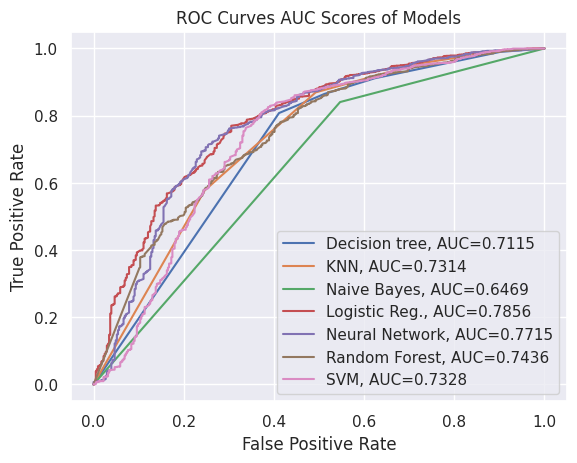

In [73]:
# Create a graph with ROC curves and AUC scores
plt.plot(fpr1,tpr1,label="Decision tree, AUC="+str(auc1))
plt.plot(fpr2,tpr2,label="KNN, AUC="+str(auc2))
plt.plot(fpr3,tpr3,label="Naive Bayes, AUC="+str(auc3))
plt.plot(fpr4,tpr4,label="Logistic Reg., AUC="+str(auc4))
plt.plot(fpr5,tpr5,label="Neural Network, AUC="+str(auc5))
plt.plot(fpr6,tpr6,label="Random Forest, AUC="+str(auc6))
plt.plot(fpr7,tpr7,label="SVM, AUC="+str(auc7))

plt.legend()
plt.title('ROC Curves AUC Scores of Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')